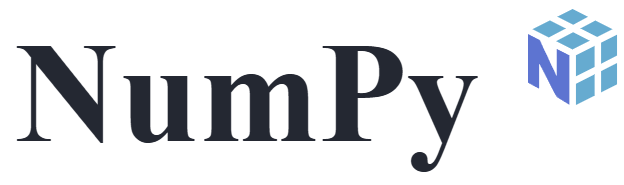

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 🐇🐺 Modelo Lotka–Volterra: Dinámica Depredador–Presa

Este Problema implementa el modelo clásico de Lotka–Volterra para estudiar la interacción dinámica entre dos especies: **presas** (por ejemplo, conejos) y **depredadores** (por ejemplo, lobos).


## 📘 Formulación matemática

El modelo se describe mediante el siguiente sistema de **ecuaciones diferenciales no lineales**:

$$
\begin{aligned}
\frac{dx}{dt} &= \alpha x - \beta x y \\
\frac{dy}{dt} &= \delta x y - \gamma y
\end{aligned}
$$

donde:
- $( x(t) )$: población de **presas** en el tiempo \( t \)
- $( y(t) )$: población de **depredadores** en el tiempo \( t \)
- $( \alpha )$: tasa de natalidad de las presas
- $( \beta )$: tasa de encuentros presa-depredador
- $( \delta )$: eficiencia de los depredadores para convertir presas en descendencia
- $( \gamma )$: tasa de mortalidad natural de los depredadores



## ⚙️ Parámetros utilizados

- $( \alpha = 1.1 )$
- $( \beta = 0.4 )$
- $( \delta = 0.1 )$
- $( \gamma = 0.4 )$
- Condiciones iniciales: $( x(0) = 40 )$, $( y(0) = 9 )$
- Intervalo de simulación: $( t \in [0, 50] )$



## 🧮 Método numérico

Se aplica el método de **Euler explícito** para aproximar la solución:

$$
\begin{aligned}
x_{n+1} &= x_n + \left( \alpha x_n - \beta x_n y_n \right) \cdot \Delta t \\
y_{n+1} &= y_n + \left( \delta x_n y_n - \gamma y_n \right) \cdot \Delta t
\end{aligned}
$$

con $( \Delta t )$ suficientemente pequeño para asegurar la estabilidad.



In [9]:
# Parámetros del modelo
alpha = 1.1   # tasa de nacimiento de presas
beta = 0.4    # tasa de depredación
delta = 0.1   # eficiencia de conversión en crías de depredador
gamma = 0.4   # tasa de muerte del depredador

# Condiciones iniciales
x0 = 40   # presas
y0 = 9    # depredadores

# Tiempo de simulación
t0 = 0
tf = 80
N = 1000
dt = (tf - t0) / N

In [10]:
# Vectores de tiempo y población
t = np.linspace(t0,tf,N)
x = np.zeros(N)
y = np.zeros(N)

# Valores iniciales
x[0] = x0
y[0] = y0

# Método de Euler para resolver el sistema
for i in range(N - 1):
    dx = alpha*x[i] - beta*x[i]*y[i]
    dy = delta*x[i]*y[i] - gamma*y[i]
    x[i + 1] = x[i] + dx * dt
    y[i + 1] = y[i] + dy *dt

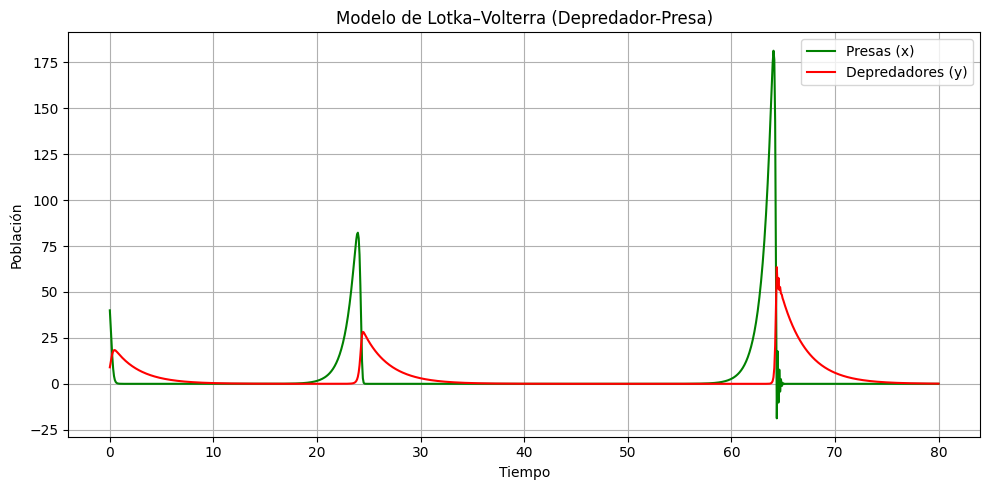

In [11]:
# 📊 Gráfico de evolución temporal
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Presas (x)', color='green')
plt.plot(t, y, label='Depredadores (y)', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo de Lotka–Volterra (Depredador-Presa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Attractor de Lorenz


La ecuación diferencial de Lorenz se representa de la siguiente manera.

\begin{aligned}
\frac{dx}{dt}=s(y-x) \\
\frac{dy}{dt}=rx-y-xz \\
\frac{dz}{dt}=xy-bz
\end{aligned}


Donde:
$s=10,r=28, b=2.667$

Las condiciones iniciales son:
$x(0)=1, y(0)=1 , z(0)=1.05$

Para poder resolver el problema:
* Utilizar Diferencias Finitas para aproximar las derivadas.
* Almacenar los valores en vectores.
* Utilizar el código de ayuda para plotear

In [13]:
# Parámetros de Lorenz
s = 10
r = 28
b = 2.667

# Condiciones iniciales
x0, y0, z0 = 1.0, 1.0, 1.05

# Configuración del tiempo
t0 = 0.0
tf = 50.0
nd = 10000  # Número de pasos
dt = (tf - t0) / nd

In [14]:
# Inicializamos los vectores para almacenar las soluciones
t = np.linspace(t0, tf, nd)
x = np.zeros(nd)
y = np.zeros(nd)
z = np.zeros(nd)

# Condiciones iniciales
x[0] = x0
y[0] = y0
z[0] = z0

# Solución usando Diferencias Finitas (Euler explícito simple)
for i in range(nd - 1):
    dx = s*(y[i]-x[i])
    dy = r*x[i] - y[i] - x[i]*z[i]
    dz = x[i]*y[i] - b*z[i]

    x[i + 1] = x[i] + dx*dt
    y[i + 1] = y[i] + dy*dt
    z[i + 1] = z[i] + dz*dt

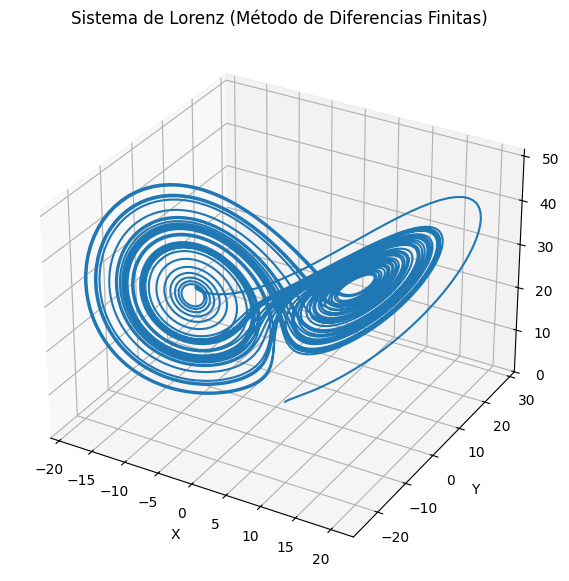

In [15]:
# Graficamos la trayectoria 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sistema de Lorenz (Método de Diferencias Finitas)')
plt.show()

### Runge Kutta 4


El método RK (de orden 4) tiene la siguiente expresión, en su forma más general:

$${\displaystyle y_{n+1}=y_{n}+h\,\sum _{i=1}^{s}b_{i}k_{i}} \qquad \qquad (1)$$


donde h es el paso por iteración, o lo que es lo mismo, el incremento ${\displaystyle \Delta t_{n}}$ entre los sucesivos puntos ${\displaystyle t_{n}}$ y ${\displaystyle t_{n+1}}$. Los coeficientes ${\displaystyle k_{i}}$ son términos de aproximación intermedios, evaluados en ƒ de manera local

$${\displaystyle k_{i}=f\left(t_{n}+h\,c_{i}\,,y_{n}+h\,\sum _{j=1}^{s}a_{ij}k_{j}\right)\quad i=1,...,s.} \qquad \qquad (2)$$

con ${\displaystyle a_{ij},b_{i},c_{i}}$ coeficientes propios del esquema numérico elegido, dependiente de la regla de cuadratura utilizada. Los esquemas Runge-Kutta pueden ser explícitos o implícitos dependiendo de las constantes ${\displaystyle a_{ij}}$ del esquema. Si esta matriz es triangular inferior con todos los elementos de la diagonal principal iguales a cero; es decir, ${\displaystyle a_{ij}=0}$ para ${\displaystyle j=i,...,s}$, los esquemas son explícitos.

De (1) y (2), para s=4, obtenemos el método de RK4:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 x_{i+1} = x_i +\Delta x \\
		 y_{i+1} = y_i + \frac{\Delta x}{6} \left( K_1 + 2K_2 +2 K_3 +K_4 \right)
	       \end{array}
	     \right.
\end{equation}

donde:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 K_1 = f(x_i,y_i) \\
		 K_2 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_1\right) \\
         K_3 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_2\right) \\
         K_4 = f(x_i +\Delta x,y_i +\Delta x K_3)
	       \end{array}
	     \right.
\end{equation}

De aqui vemos que el método RK4 toma una mejor estimacion de la pendiente, ya que (dado un intervalo $[x_i,x_{i+1}]$) considera un promedio ponderado de la pendiente en el extremo izquierdo $K_1$, dos pendientes mejoradas en el punto medio $K_2$ y $K_3$ y una pendiente en el extremo derecho $K_4$.

In [16]:
def rk4(f,x0,y0,xf,nd):
    x = np.zeros(nd)
    y = np.zeros(nd)
    dx = float(xf-x0)/nd
    x[0] = x0
    y[0] = y0

    for i in range(nd-1):
        x[i+1] = x[i] + dx
        k1 = f(x[i] , y[i])
        k2 = f(x[i] + dx/2, y[i] + dx/2*k1)
        k3 = f(x[i] + dx/2, y[i] + dx/2*k2)
        k4 = f(x[i] + dx  , y[i] + dx*k3)
        y[i+1] = y[i] + dx/6*(k1 + 2*k2 + 2*k3 + k4)

    return x, y

Considere el siguiente PVI:
\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = 2xy-x \equiv f(x,y)\\
		 y(0) = 0.4
	       \end{array}
	     \right.
\end{equation}

In [17]:
def fun(x,y):
    return 2*x*y-x

def sol(x):
    return (-1.0/10)*np.exp(pow(x,2))-0.5

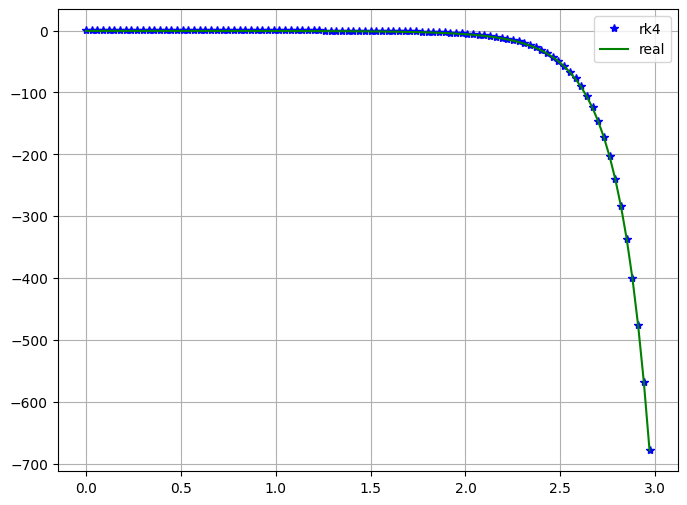

In [22]:
##Comparación
xx, yy = rk4(fun,0,0.4,3,100)

vsol = np.vectorize(sol)
yex = vsol(xx)

plt.figure(figsize=(8,6))
plt.plot(xx,yy,'b*',label = 'rk4')
plt.plot(xx,yex,'g', label='real')
plt.grid(True)
plt.legend()

## Péndulo Simple

La ecuación del movimiento no lineal de un péndulo se rige por:
$$
m L \frac{d^2 \theta}{dt^2} = - m g  \sin \theta.
$$

Donde $d\theta / d t = \omega$, se puede reescribir la ecuación diferencial de segundo orden como un sistema de ecuaciones de primer orden.
\begin{align}
\frac{d \theta}{dt} & = \omega, \\
\frac{d \omega}{dt} & = -\frac{g}{L} \sin \theta~,
\end{align}

así se puede resolver usando métodos de primer orden.

Para ángulo pequeños $\theta$ se puede aproximar $\sin \theta \approx \theta$, quedando la ecuación:
$$
m L \frac{d^2 \theta}{dt^2} \approx - m g \theta.
$$

Para un péndulo con ángulo inicial $\theta_0$, la solución analítica para ángulos pequeños es:
$$
\theta(t) \approx \theta_0 \cos\left( \sqrt{\frac{g}{L}} t + \phi\right),
$$
donde $\phi = 0$ es la posición inicial.

In [23]:
# Definimos el integrador RK4 que recibe una función f(t, state)
def rk4_system(f, t0, state0, tf, nd):
    t = np.zeros(nd)
    state = np.zeros((nd, len(state0)))
    dt = (tf - t0) / nd
    t[0] = t0
    state[0] = state0

    for i in range(nd - 1):
        t[i + 1] = t[i] + dt
        k1 = f(t[i], state[i])
        k2 = f(t[i] + dt/2, state[i] + dt/2 * k1)
        k3 = f(t[i] + dt/2, state[i] + dt/2 * k2)
        k4 = f(t[i] + dt, state[i] + dt * k3)
        state[i + 1] = state[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return t, state

In [26]:
# Parámetros del sistema
g = 9.81 #m/s^2
L = 0.1 #m

# Función de evolución del sistema para el péndulo simple
def fpendulum(t, xin):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega, -g/L*np.sin(theta)])

# Condiciones iniciales
theta0 = (20. / 180.) * np.pi
omega0 = 0.
state0 = np.array([theta0, omega0])

# Tiempo de simulación
t0 = 0.
tf = 2.0
N = 5000

In [27]:
# Ejecutar el método RK4
tpoints, sol = rk4_system(fpendulum,t0,state0,tf,N)

In [28]:
xpoints = sol[:,0]  # θ(t)
ypoints = sol[:,1]  # ω(t)

In [29]:
# Solución analítica para ángulos pequeños
def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g / L) * t)

xpoints_small = theta_small_angles(tpoints)

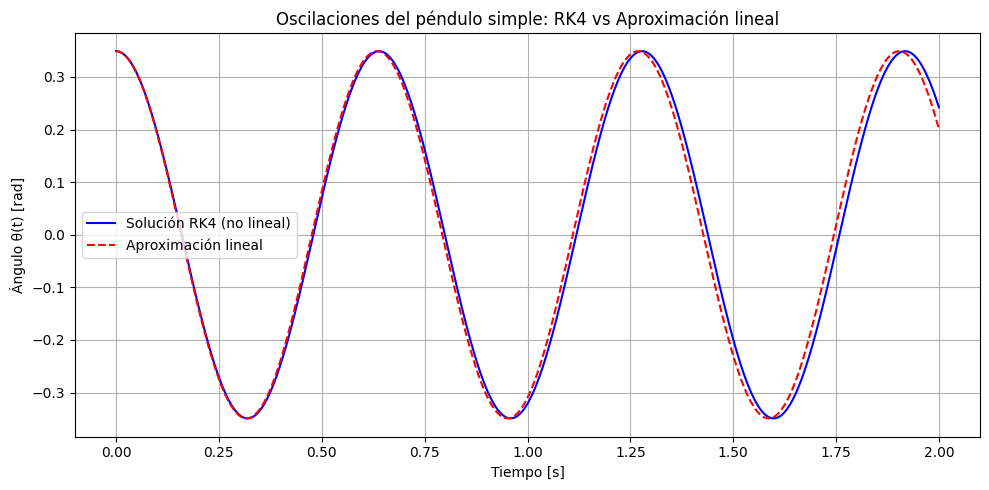

In [30]:
# Graficar
plt.figure(figsize=(10, 5))
plt.plot(tpoints, xpoints, label='Solución RK4 (no lineal)', color='blue')
plt.plot(tpoints, xpoints_small, label='Aproximación lineal', linestyle='--', color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo θ(t) [rad]')
plt.title('Oscilaciones del péndulo simple: RK4 vs Aproximación lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Planetas mediante dos de las leyes de Newton

Newton pudo probar que los planetas viajan en órbitas elípticas con el Sol en uno de los focos, y luego predecir los períodos de su movimiento. Él postuló que la fuerza entre un planeta de masa \( m \) y el Sol de masa \( M \) es:

$$
F^{(G)} = -\frac{GmM}{r^2},
\tag{1}
$$

donde \( r \) es la distancia entre el planeta y el Sol, y \( G \) es la constante gravitacional universal.  
La fuerza atractiva actúa a lo largo de la línea que conecta el planeta y el Sol.


El movimiento del planeta satisface la segunda ley de Newton:

$$
F = ma = m \frac{d^2 \mathbf{x}}{dt^2},
\tag{2}
$$

donde la fuerza gravitacional (1) tiene componentes cartesianas:

$$
F_x = F^{(G)} \cos \theta = F^{(G)} \frac{x}{r} = F^{(G)} \frac{x}{\sqrt{x^2 + y^2}},
\tag{3}
$$

$$
F_y = F^{(G)} \sin \theta = F^{(G)} \frac{y}{r} = F^{(G)} \frac{y}{\sqrt{x^2 + y^2}}.
\tag{4}
$$

Así, la ecuación de movimiento (2) se convierte en dos EDOs (ecuaciones diferenciales ordinarias) de segundo orden:

$$
\frac{d^2 x}{dt^2} = -GM \frac{x}{(x^2 + y^2)^{3/2}}, \quad
\frac{d^2 y}{dt^2} = -GM \frac{y}{(x^2 + y^2)^{3/2}}.
\tag{5}
$$



Introducimos las siguientes variables auxiliares:

$$
v_x = \frac{dx}{dt}, \quad v_y = \frac{dy}{dt}
$$

El sistema se convierte entonces en un sistema lineal de **cuatro ecuaciones diferenciales de primer orden**:

$$
\begin{aligned}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= -GM \frac{x}{(x^2 + y^2)^{3/2}} \\
\frac{dv_y}{dt} &= -GM \frac{y}{(x^2 + y^2)^{3/2}}
\end{aligned}
$$

Podemos escribir el sistema como:

$$
\frac{d}{dt}
\begin{pmatrix}
x \\
y \\
v_x \\
v_y
\end{pmatrix}
=
\begin{pmatrix}
v_x \\
v_y \\
- GM \dfrac{x}{(x^2 + y^2)^{3/2}} \\
- GM \dfrac{y}{(x^2 + y^2)^{3/2}}
\end{pmatrix}
$$

### Actividades

1. Supón unidades tales que \( GM = 1 \) y condiciones iniciales:

$$
x(0) = 0.5, \quad y(0) = 0, \quad v_x(0) = 0.0, \quad v_y(0) = 1.63.
\tag{6}
$$

2. Resuelve las EDOs (5).

3. Experimenta con las condiciones iniciales hasta encontrar las que produzcan una órbita **circular** (caso especial de una elipse).




In [31]:
# Definimos el sistema de ecuaciones para el movimiento planetario
def planet_motion(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    GM = 1.0  # Unidades en las que GM = 1
    ax = -GM*x/(r**3)
    ay = -GM*y/r**3
    return np.array([vx,vy,ax,ay])

In [32]:
# Condiciones iniciales
x0 = 0.5
y0 = 0.0
vx0 = 0.0
vy0 = 1.63
state0 = np.array([x0,y0,vx0,vy0])

# Configuración del tiempo
t0 = 0.0
tf = 10.0  # Simular 10 unidades de tiempo
nd = 5000  # Número de pasos (pequeño dt)

# Solución usando RK4
t, state = rk4_system(planet_motion, t0, state0, tf, nd)

# Extraer las posiciones
x = state[:, 0]
y = state[:, 1]

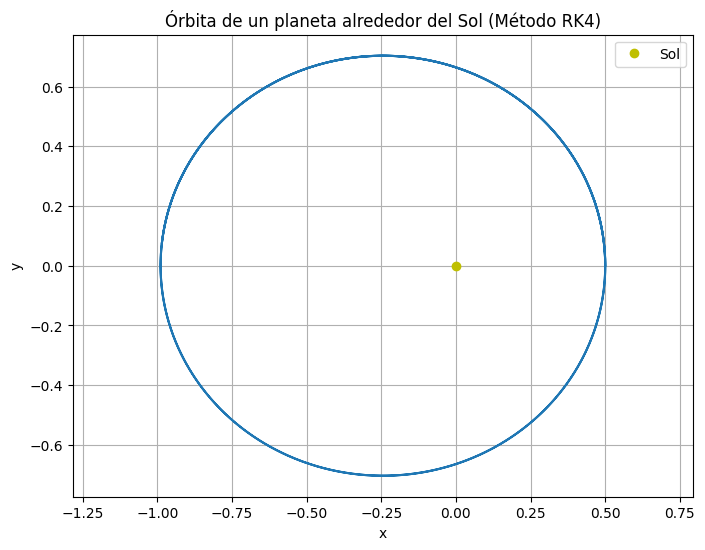

In [33]:
# Graficar la órbita
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.plot(0, 0, 'yo', label='Sol')  # El Sol en el origen
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbita de un planeta alrededor del Sol (Método RK4)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

## Problema de N ecuaciones lineales
Imagina que tu modelo de algún sistema físico resulta en **N = 100** ecuaciones lineales acopladas en **N** incógnitas:

$$
a_{00} y_0 + a_{01} y_1 + \cdots + a_{0(N-1)} y_{N-1} = b_0,
$$
$$
a_{10} y_0 + a_{11} y_1 + \cdots + a_{1(N-1)} y_{N-1} = b_1,
$$

$$
\vdots
$$

$$
a_{(N-1)0} y_0 + a_{(N-1)1} y_1 + \cdots + a_{(N-1)(N-1)} y_{N-1} = b_{N-1}.
$$

En muchos casos, los valores de \( a \) y \( b \) son conocidos, por lo que tu ejercicio es resolver para todos los valores de \( y \), tomando \( a \) como la **matriz de Hilbert** y \( b \) como su **primera columna**:

$$
[a_{ij}] = A = \left[ \frac{1}{i + j - 1} \right] =
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{100} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{101} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
\frac{1}{100} & \frac{1}{101} & \cdots & \cdots & \cdots & \frac{1}{199}
\end{pmatrix},
$$

$$
[b_i] = b = \left[ \frac{1}{i} \right] =
\begin{pmatrix}
1 \\
\frac{1}{2} \\
\frac{1}{3} \\
\vdots \\
\frac{1}{100}
\end{pmatrix}.
$$

Resolver:

$$
\Large
Ay = b
$$

Finalmente, compara tu resultado con la **solución analítica**:

$$
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{pmatrix}
=
\begin{pmatrix}
1 \\
0 \\
\vdots \\
0
\end{pmatrix}.
$$


In [35]:
# Definimos el tamaño del sistema
N = 100

# Creamos la matriz de Hilbert de tamaño NxN
A = np.array([ [ 1/( (i+1) + (j+1) -1) for j in range(N)] for i in range(N) ])
A

array([[1.        , 0.5       , 0.33333333, ..., 0.01020408, 0.01010101,
        0.01      ],
       [0.5       , 0.33333333, 0.25      , ..., 0.01010101, 0.01      ,
        0.00990099],
       [0.33333333, 0.25      , 0.2       , ..., 0.01      , 0.00990099,
        0.00980392],
       ...,
       [0.01020408, 0.01010101, 0.01      , ..., 0.00512821, 0.00510204,
        0.00507614],
       [0.01010101, 0.01      , 0.00990099, ..., 0.00510204, 0.00507614,
        0.00505051],
       [0.01      , 0.00990099, 0.00980392, ..., 0.00507614, 0.00505051,
        0.00502513]])

In [36]:
# Creamos el vector b (primera columna)
b = np.array([ 1/(i+1) for i in range(N) ])
b

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
       0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
       0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
       0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
       0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
       0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
       0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
       0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
       0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
       0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
       0.01408451, 0.01388889, 0.01369863, 0.01351351, 0.01333

In [37]:
# Usamos numpy.linalg.solve para resolver el sistema
y = np.linalg.solve(A, b)

# Mostramos las primeras y últimas 10 soluciones para ver el comportamiento
y[:10]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.])

In [39]:
y[-10:]

array([-0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.])

## Matrices Gamma de Dirac

*Dirac Gamma Matrices:*  
La ecuación de Dirac extiende la mecánica cuántica para incluir la relatividad y el espín \(1/2\).  
La extensión del operador Hamiltoniano para un electrón requiere el uso de matrices, y estas matrices se expresan en términos de matrices ($\gamma $) de tamaño ($4 \times 4$), que pueden representarse utilizando las matrices de Pauli ($ \sigma_i $) de tamaño $(2 \times 2)$:

$$
\gamma_i = \begin{pmatrix}
0 & \sigma_i \\
-\sigma_i & 0
\end{pmatrix}, \quad i = 1, 2, 3,
\tag{1}
$$

donde las matrices de Pauli son:

$$
\sigma_1 = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}, \quad
\sigma_2 = \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}, \quad
\sigma_3 = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\tag{2}
$$


## Propiedades a confirmar

Confirma las siguientes propiedades de las matrices ($\gamma $):

$$
\gamma_2^\dagger = \gamma_2^{-1} = -\gamma_2,
\tag{3}
$$

$$
\gamma_1 \gamma_2 = -i
\begin{pmatrix}
\sigma_3 & 0 \\
0 & \sigma_3
\end{pmatrix}.
\tag{4}
$$


In [40]:
# Definimos las matrices de Pauli
sigma_1 = np.array([[0 , 1],
                    [1 , 0]])

sigma_2 = np.array([[0 , -1j],
                    [1j , 0]])

sigma_3 = np.array([[1 , 0],
                    [0 , -1]])

sigma_1, sigma_2, sigma_3

(array([[0, 1],
        [1, 0]]),
 array([[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]),
 array([[ 1,  0],
        [ 0, -1]]))

In [42]:
# Construimos las matrices gamma
gamma_1 = np.block([[np.zeros((2,2)), sigma_1],
                   [-sigma_1 , np.zeros((2,2))]])

gamma_2 = np.block([[np.zeros((2,2)), sigma_2],
                   [-sigma_2 , np.zeros((2,2))]])

gamma_3 = np.block([[np.zeros((2,2)), sigma_3],
                   [-sigma_3 , np.zeros((2,2))]])

gamma_1, gamma_2, gamma_3

(array([[ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.],
        [ 0., -1.,  0.,  0.],
        [-1.,  0.,  0.,  0.]]),
 array([[ 0.+0.j,  0.+0.j,  0.+0.j, -0.-1.j],
        [ 0.+0.j,  0.+0.j,  0.+1.j,  0.+0.j],
        [-0.-0.j,  0.+1.j,  0.+0.j,  0.+0.j],
        [-0.-1.j, -0.-0.j,  0.+0.j,  0.+0.j]]),
 array([[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0., -1.],
        [-1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.]]))

In [43]:
# Propiedad 1: Confirmar que gamma_2† = gamma_2⁻¹ = -gamma_2
gamma_2_dagger = np.conjugate(gamma_2.T)
gamma_2_inv = np.linalg.inv(gamma_2)

property1 = np.allclose(gamma_2_dagger, -gamma_2) and np.allclose(gamma_2_inv, -gamma_2)
property1

True

In [44]:
# Propiedad 2: Confirmar que gamma_1 * gamma_2 = -i (sigma_3  0; 0  sigma_3)
gamma1_gamma2 = np.dot(gamma_1,gamma_2)

expected_rhs = -1j * np.block([[sigma_3, np.zeros((2, 2))],
                               [np.zeros((2, 2)), sigma_3]])

property2 = np.allclose(gamma1_gamma2, expected_rhs)
property2

True